<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_with_Tensorflow_KERAS_CNN_and_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()


### Load the Dataset and Prepare testing and training data

In [2]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, MaxPool2D

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

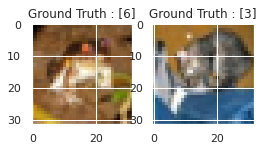

In [5]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

## Display images for each category

0


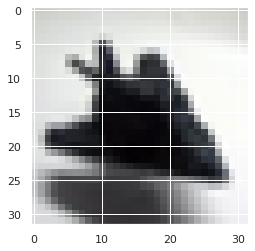

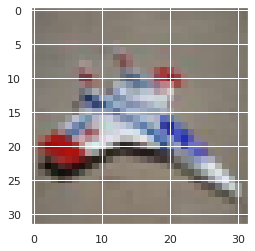

**************************************************
1


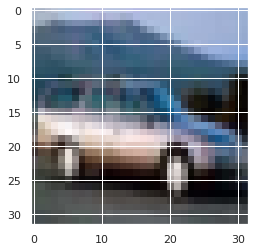

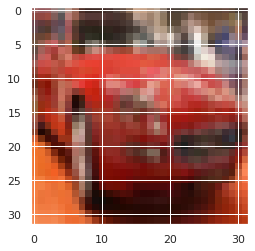

**************************************************
2


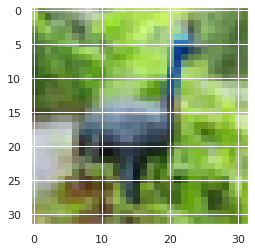

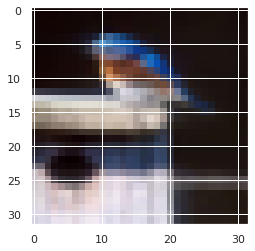

**************************************************
3


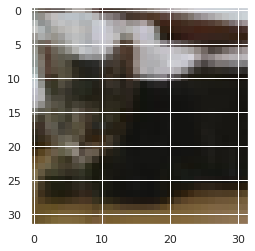

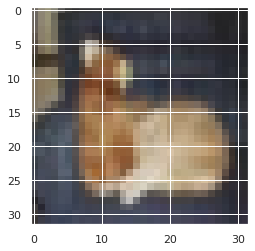

**************************************************
4


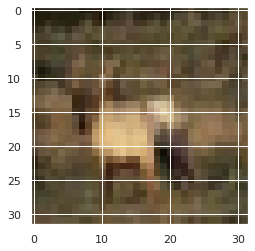

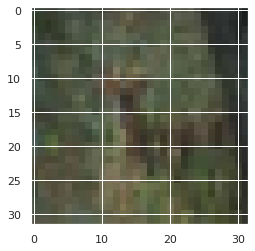

**************************************************
5


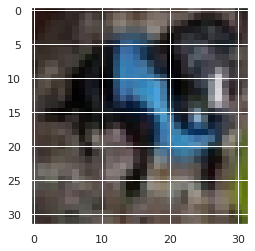

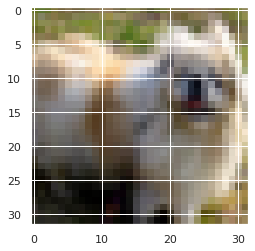

**************************************************
6


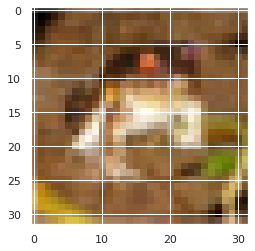

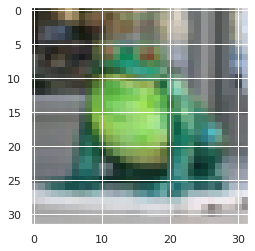

**************************************************
7


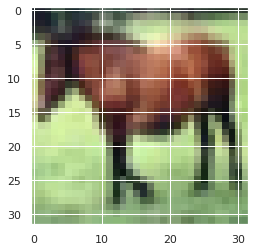

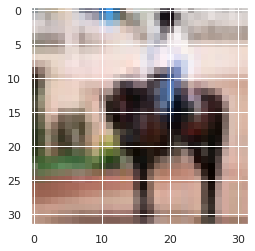

**************************************************
8


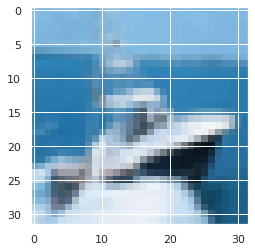

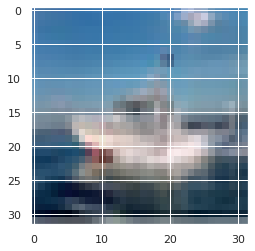

**************************************************
9


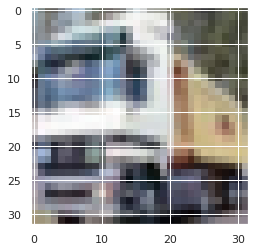

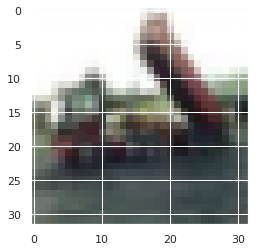

**************************************************


In [6]:
for category in np.unique(y_train):
  counter=2
  print(category)
  for idx, label in enumerate(y_train):
    if counter <1:
      break
    if label==category:
      
      counter-= 1
      plt.imshow(x_train[idx])
      plt.show()
  print("*"*50)

# Approach -1 - Using simple DNN or FC

In [7]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# train set / data 
x_train = x_train.reshape(-1, 32*32*3)
x_train = x_train.astype('float32') / 255



# test set / data 
x_test = x_test.reshape(-1, 32*32*3)
x_test = x_test.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

# test set / target 
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [8]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [9]:
#Models
model = Sequential()
model.add(Dense(800, input_dim=3072, activation="relu"))
model.add(Dense(10, activation="softmax"))

# For using custom metrics
# https://keras.io/api/metrics/#custom-metrics

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy",tf.keras.metrics.AUC()])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)
# https://keras.io/api/models/model_training_apis/

Epoch 1/5
250/250 [==============================] - 5s 9ms/step - loss: 1.9968 - accuracy: 0.2895 - auc: 0.7426 - val_loss: 1.8724 - val_accuracy: 0.3621 - val_auc: 0.7865
Epoch 2/5
250/250 [==============================] - 2s 8ms/step - loss: 1.8424 - accuracy: 0.3575 - auc: 0.7931 - val_loss: 1.8003 - val_accuracy: 0.3742 - val_auc: 0.8029
Epoch 3/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7855 - accuracy: 0.3807 - auc: 0.8081 - val_loss: 1.7664 - val_accuracy: 0.3822 - val_auc: 0.8128
Epoch 4/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7452 - accuracy: 0.3945 - auc: 0.8182 - val_loss: 1.7249 - val_accuracy: 0.4040 - val_auc: 0.8221
Epoch 5/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7135 - accuracy: 0.4074 - auc: 0.8256 - val_loss: 1.7037 - val_accuracy: 0.4111 - val_auc: 0.8271


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               2458400   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 2,466,410
Trainable params: 2,466,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
history.history

{'accuracy': [0.28953999280929565,
  0.3575200140476227,
  0.38071998953819275,
  0.39447999000549316,
  0.4074400067329407],
 'auc': [0.7426010370254517,
  0.7931068539619446,
  0.8081432580947876,
  0.8181830644607544,
  0.8256331086158752],
 'loss': [1.9968160390853882,
  1.8423787355422974,
  1.7854588031768799,
  1.7451637983322144,
  1.7135138511657715],
 'val_accuracy': [0.3621000051498413,
  0.3741999864578247,
  0.3822000026702881,
  0.40400001406669617,
  0.41110000014305115],
 'val_auc': [0.7865101099014282,
  0.802906334400177,
  0.8127662539482117,
  0.8220681548118591,
  0.8270743489265442],
 'val_loss': [1.8724199533462524,
  1.8002921342849731,
  1.7664192914962769,
  1.724945306777954,
  1.7036998271942139]}

Text(0.5, 1.0, 'Loss Curves')

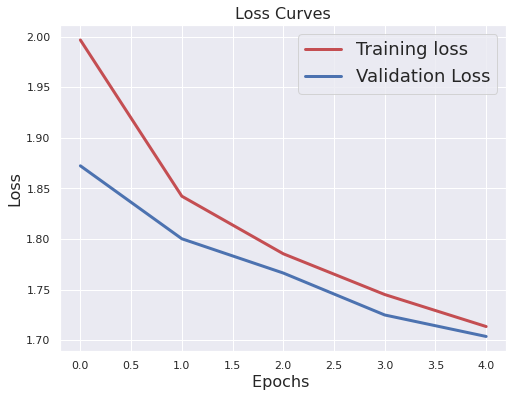

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

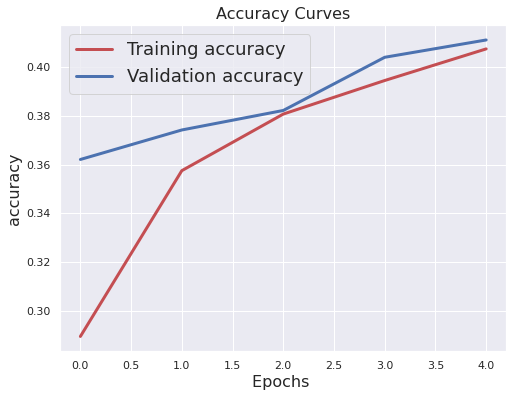

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'AUC Curves')

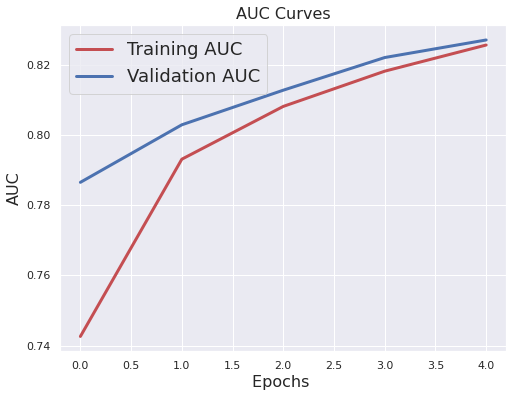

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['auc'],'r',linewidth=3.0)
plt.plot(history.history['val_auc'],'b',linewidth=3.0)
plt.legend(['Training AUC', 'Validation AUC'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('AUC',fontsize=16)
plt.title('AUC Curves',fontsize=16)

# Approach -2 : Using CNN

## Change the Datatype to Float and Normalize it

In [16]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#Normalize
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [17]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


## Do the one hot Encoding of the Dependent Variable using Keras.utils

In [18]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [19]:
num_classes= len(np.unique(y_train))

In [20]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation, Training and Test.

In [21]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [22]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [23]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


#  

## Build a CNN Architecture with KERAS

#### CNN using just the CONV layers

In [24]:
model=Sequential()
model.add(Conv2D(filters=9,kernel_size=3,activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=6,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=3,kernel_size=3,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 9)         252       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         492       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 3)         165       
Total params: 909
Trainable params: 909
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 9)         252       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         492       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 3)         165       
_________________________________________________________________
flatten (Flatten)            (None, 2028)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               519424    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 522,903
Trainable params: 522,903
Non-trainable params: 0
________________________________________________

In [26]:
#Compile & Train the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)

Epoch 1/5
225/225 [==============================] - 30s 13ms/step - loss: 2.2909 - accuracy: 0.1080 - val_loss: 2.2496 - val_accuracy: 0.1366
Epoch 2/5
225/225 [==============================] - 3s 11ms/step - loss: 2.1495 - accuracy: 0.2148 - val_loss: 2.0538 - val_accuracy: 0.2702
Epoch 3/5
225/225 [==============================] - 3s 11ms/step - loss: 2.0202 - accuracy: 0.2780 - val_loss: 1.9644 - val_accuracy: 0.3064
Epoch 4/5
225/225 [==============================] - 3s 12ms/step - loss: 1.9496 - accuracy: 0.3097 - val_loss: 1.9002 - val_accuracy: 0.3350
Epoch 5/5
225/225 [==============================] - 3s 12ms/step - loss: 1.8992 - accuracy: 0.3281 - val_loss: 1.8562 - val_accuracy: 0.3438


Text(0.5, 1.0, 'Accuracy Curves')

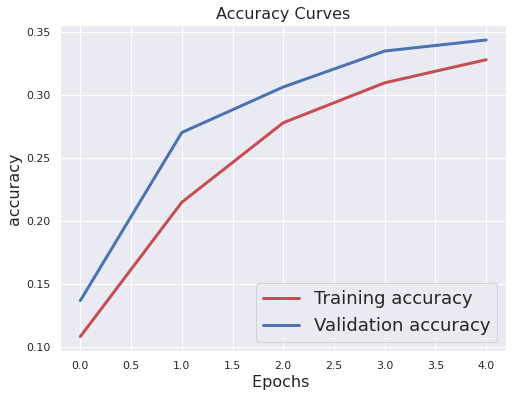

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

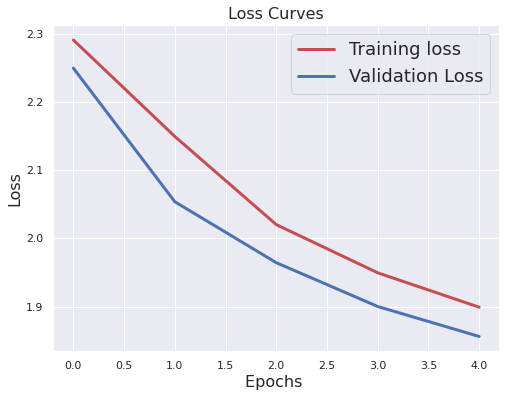

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#### CNN using CONV+ POOLING Layers

In [29]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [30]:
#Compile & Train the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)

Epoch 1/5
225/225 [==============================] - 3s 9ms/step - loss: 2.2994 - accuracy: 0.1034 - val_loss: 2.2956 - val_accuracy: 0.1144
Epoch 2/5
225/225 [==============================] - 2s 8ms/step - loss: 2.2887 - accuracy: 0.1367 - val_loss: 2.2790 - val_accuracy: 0.1580
Epoch 3/5
225/225 [==============================] - 2s 9ms/step - loss: 2.2549 - accuracy: 0.1656 - val_loss: 2.2157 - val_accuracy: 0.1970
Epoch 4/5
225/225 [==============================] - 2s 8ms/step - loss: 2.1526 - accuracy: 0.2106 - val_loss: 2.0739 - val_accuracy: 0.2378
Epoch 5/5
225/225 [==============================] - 2s 8ms/step - loss: 2.0690 - accuracy: 0.2330 - val_loss: 2.0453 - val_accuracy: 0.2390


Text(0.5, 1.0, 'Loss Curves')

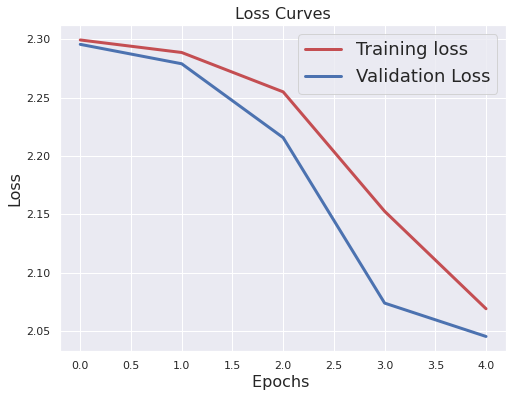

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

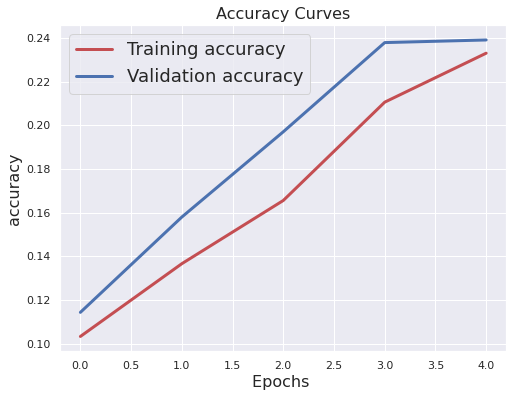

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Build a CNN Architecture with Tensorflow

In [33]:
import tensorflow as tf

In [34]:
del model
model= tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [35]:
x_train.shape,y_train.shape

((45000, 32, 32, 3), (45000, 10))

In [36]:
answers=model.fit(x_train,y_train,
                  validation_data=(x_valid,y_valid),
                  shuffle=True,epochs=2,verbose=2,batch_size=200)

Epoch 1/2
225/225 - 2s - loss: 1.9710 - accuracy: 0.2752 - val_loss: 1.7185 - val_accuracy: 0.3774
Epoch 2/2
225/225 - 1s - loss: 1.6511 - accuracy: 0.3930 - val_loss: 1.5943 - val_accuracy: 0.4230


### Stack an ANN on top of CNN

In [37]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.summary()

### Stack an ANN on top of CNN

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer='uniform'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

### Fit the model

In [38]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=2,verbose=2,batch_size=500)

Epoch 1/2
90/90 - 3s - loss: 2.0820 - accuracy: 0.1594 - val_loss: 1.9494 - val_accuracy: 0.1948
Epoch 2/2
90/90 - 1s - loss: 1.9056 - accuracy: 0.2185 - val_loss: 1.8394 - val_accuracy: 0.2794


### Evaluate the Results

In [39]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.8304 - accuracy: 0.2819


In [40]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

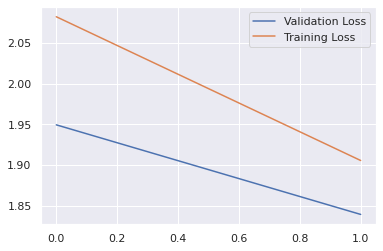

In [41]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

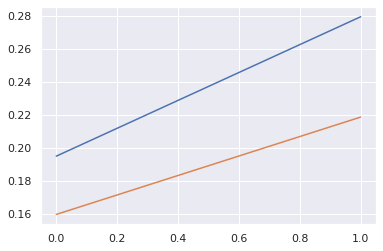

In [42]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;

# Approch -3 CNN

In [43]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(x_train,y_train,validation_data=(x_valid,y_valid), batch_size=100, epochs=8)

Epoch 1/8
450/450 [==============================] - 7s 14ms/step - loss: 1.5023 - accuracy: 0.4633 - val_loss: 1.2331 - val_accuracy: 0.5672
Epoch 2/8
450/450 [==============================] - 6s 14ms/step - loss: 1.1408 - accuracy: 0.5996 - val_loss: 1.0570 - val_accuracy: 0.6294
Epoch 3/8
450/450 [==============================] - 6s 14ms/step - loss: 0.9779 - accuracy: 0.6612 - val_loss: 1.0220 - val_accuracy: 0.6442
Epoch 4/8
450/450 [==============================] - 6s 14ms/step - loss: 0.8702 - accuracy: 0.6992 - val_loss: 0.9797 - val_accuracy: 0.6604
Epoch 5/8
450/450 [==============================] - 6s 14ms/step - loss: 0.7860 - accuracy: 0.7278 - val_loss: 0.9733 - val_accuracy: 0.6706
Epoch 6/8
450/450 [==============================] - 6s 14ms/step - loss: 0.6986 - accuracy: 0.7605 - val_loss: 0.9942 - val_accuracy: 0.6710
Epoch 7/8
450/450 [==============================] - 6s 14ms/step - loss: 0.6206 - accuracy: 0.7856 - val_loss: 1.0672 - val_accuracy: 0.6494
Epoch 

# CNN - Experiment - 4

In [44]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
simple_cnn_model.add(MaxPool2D(pool_size=2))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(MaxPool2D(pool_size=2))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(x_train,y_train,validation_data=(x_valid,y_valid), batch_size=100, epochs=8)

Epoch 1/8
450/450 [==============================] - 4s 9ms/step - loss: 1.7455 - accuracy: 0.3622 - val_loss: 1.4833 - val_accuracy: 0.4572
Epoch 2/8
450/450 [==============================] - 4s 9ms/step - loss: 1.4485 - accuracy: 0.4811 - val_loss: 1.4065 - val_accuracy: 0.4882
Epoch 3/8
450/450 [==============================] - 4s 9ms/step - loss: 1.3349 - accuracy: 0.5229 - val_loss: 1.2985 - val_accuracy: 0.5306
Epoch 4/8
450/450 [==============================] - 4s 10ms/step - loss: 1.2605 - accuracy: 0.5513 - val_loss: 1.2250 - val_accuracy: 0.5748
Epoch 5/8
450/450 [==============================] - 4s 10ms/step - loss: 1.2017 - accuracy: 0.5741 - val_loss: 1.2015 - val_accuracy: 0.5844
Epoch 6/8
450/450 [==============================] - 4s 10ms/step - loss: 1.1475 - accuracy: 0.5937 - val_loss: 1.1151 - val_accuracy: 0.6134
Epoch 7/8
450/450 [==============================] - 4s 9ms/step - loss: 1.1027 - accuracy: 0.6116 - val_loss: 1.1054 - val_accuracy: 0.6132
Epoch 8/8


# Alternative Approach
https://www.kaggle.com/aayushkubba/cifar-10-analysis-with-a-neural-network

## Data Augmentation 
To get a more generalised model

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [46]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, vertical_flip=True,
    validation_split=0.2)

In [51]:
type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [47]:
from keras.layers import Conv2D, Flatten
augmented_simple_cnn_model = Sequential()
augmented_simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
augmented_simple_cnn_model.add(MaxPool2D(pool_size=2))
augmented_simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
augmented_simple_cnn_model.add(MaxPool2D(pool_size=2))
augmented_simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
augmented_simple_cnn_model.add(Flatten())
augmented_simple_cnn_model.add(Dense(10, activation='softmax'))


In [50]:
augmented_simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
augmented_simple_cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [54]:
augmented_simple_cnn_model_history=augmented_simple_cnn_model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                                                                            validation_data=(x_valid,y_valid),
                                                                            epochs=8)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
176/176 [==============================] - 27s 148ms/step - loss: 2.0438 - accuracy: 0.2330 - val_loss: 1.8279 - val_accuracy: 0.3168
Epoch 2/8
176/176 [==============================] - 25s 143ms/step - loss: 1.8194 - accuracy: 0.3187 - val_loss: 1.7258 - val_accuracy: 0.3432
Epoch 3/8
176/176 [==============================] - 25s 142ms/step - loss: 1.7486 - accuracy: 0.3501 - val_loss: 1.6791 - val_accuracy: 0.3800
Epoch 4/8
176/176 [==============================] - 25s 141ms/step - loss: 1.7058 - accuracy: 0.3668 - val_loss: 1.6154 - val_accuracy: 0.4102
Epoch 5/8
176/176 [==============================] - 25s 142ms/step - loss: 1.6677 - accuracy: 0.3815 - val_loss: 1.6091 - val_accuracy: 0.4122
Epoch 6/8
176/176 [==============================] - 25s 141ms/step - loss: 1.6423 - accuracy: 0.3947 - val_loss: 1.5375 - val_accuracy: 0.4448
Epoch 7/8
176/176 [==============================] - 25s 141ms/step - loss: 1.6261 - accuracy: 0.4043 - val_loss: 1.5533 - val_accuracy:

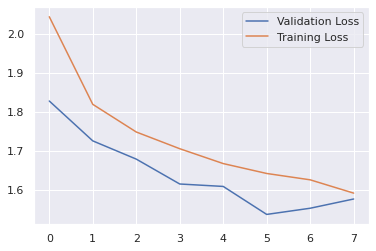

In [55]:
plt.plot(augmented_simple_cnn_model_history.history['val_loss'],label='Validation Loss');
plt.plot(augmented_simple_cnn_model_history.history['loss'],label='Training Loss');
plt.legend();

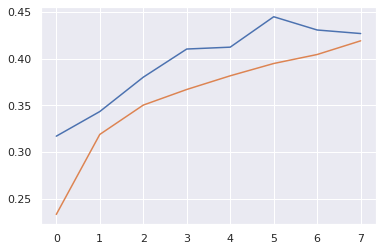

In [56]:
plt.plot(augmented_simple_cnn_model_history.history['val_accuracy'],label='Validation Accuracy');
plt.plot(augmented_simple_cnn_model_history.history['accuracy'],label='Training Accuracy');
plt.legend;

# Transfer Learning

## RESNET

In [62]:
from keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout

In [79]:
# RESNET as the base model
base_model=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)

# We will only use resnet for feature extarction, freeze all the layers that we dont need
for layer in base_model.layers:
  layer.trainable=False

# Take the output output of the base layers
base_model_output=base_model.output

# Add our layers
## Pooling
x=GlobalAveragePooling2D()(base_model_output)
## FC
x=Dense(2056,activation='relu')(x)
## Dropout
x=Dropout(0.5)(x)
## Output layer
x=Dense(10,activation='softmax')(x)

In [80]:
resnet_model=Model(inputs=base_model.input,outputs=x)

In [81]:
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [82]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

For reference

Without freezing

Epoch 1/8
176/176 [==============================] - 50s 238ms/step - loss: 1.4530 - accuracy: 0.5499 - val_loss: 4.2816 - val_accuracy: 0.1038
Epoch 2/8

In [83]:
resnet_model_history=resnet_model.fit(x_train,y_train,batch_size=batch_size,
                                      validation_data=(x_valid,y_valid),epochs=8,shuffle=True)

Epoch 1/8
176/176 [==============================] - 18s 83ms/step - loss: 2.3227 - accuracy: 0.1984 - val_loss: 2.0440 - val_accuracy: 0.2604
Epoch 2/8
176/176 [==============================] - 13s 75ms/step - loss: 2.0166 - accuracy: 0.2598 - val_loss: 1.9430 - val_accuracy: 0.2866
Epoch 3/8
176/176 [==============================] - 13s 75ms/step - loss: 1.9657 - accuracy: 0.2806 - val_loss: 1.9092 - val_accuracy: 0.3002
Epoch 4/8
176/176 [==============================] - 13s 74ms/step - loss: 1.9390 - accuracy: 0.2922 - val_loss: 1.8715 - val_accuracy: 0.3220
Epoch 5/8
176/176 [==============================] - 13s 75ms/step - loss: 1.9224 - accuracy: 0.2981 - val_loss: 1.8699 - val_accuracy: 0.3274
Epoch 6/8
176/176 [==============================] - 13s 75ms/step - loss: 1.9192 - accuracy: 0.3010 - val_loss: 1.8423 - val_accuracy: 0.3422
Epoch 7/8
176/176 [==============================] - 13s 75ms/step - loss: 1.9107 - accuracy: 0.3021 - val_loss: 1.8356 - val_accuracy: 0.3516